In [113]:
import pandas as pd
import numpy as np
import tensorflow as tf
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [142]:
N = 20000
X_data = np.random.randn(N,3)
w, b = np.array([0.3, 0.5, 0.1]), -0.2
wxb = np.matmul(w, X_data.T) + b
y_data = np.random.binomial(1, sigmoid(wxb)).astype(np.float32)

In [143]:
y_data

array([ 1.,  0.,  0., ...,  0.,  1.,  1.], dtype=float32)

,0,1,2,3
15,0.291224,0.510773,0.10008,-0.217367
16,0.291224,0.510773,0.10008,-0.217367
17,0.291224,0.510773,0.10008,-0.217367
18,0.291224,0.510773,0.10008,-0.217367
19,0.291224,0.510773,0.10008,-0.217367


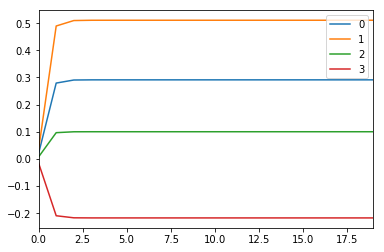

In [153]:
learning_rate = 0.3
epochs = 1000

X = tf.placeholder(dtype=tf.float32, shape=[None, 3])
y = tf.placeholder(dtype=tf.float32, shape=None)

W = tf.Variable(tf.zeros([1, 3]))
b = tf.Variable(tf.zeros([1, 1]))

y_pred = tf.matmul(W, tf.transpose(X)) + b 
y_pred_prob = tf.sigmoid(y_pred)

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits = y_pred)
loss = tf.reduce_mean(loss)

solver = tf.train.GradientDescentOptimizer(learning_rate)
train = solver.minimize(loss)
accuracy= tf.metrics.accuracy(labels=y, predictions=y)

weights = np.empty([0, 4])
with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    for step in range(epochs):
        session.run(train, feed_dict={X: X_data, y: y_data})
        
        if step % 50 == 0:
            W_, b_ = session.run([W, b])
            weights = np.vstack([weights, np.hstack([W_, b_])])
            #print("Accuracy: ", accuracy_)
            

df = pd.DataFrame(weights)
df.plot()
df.tail()

In [154]:
#with tf.Session() as session:
#    session.run(tf.global_variables_initializer())
#    print(session.run(accuracy, feed_dict={X: X_data, y: y_data}))